<h1>HbA1c Simulation Code

 Forward: 
    something about the code and the licence/ use. Please cite paper if code is used...

The python libraries required for running this code are as follows:
1. numpy
2. scipy
3. csv
4. random
5. multiprocessing
6. sklearn
7. math
8. tqdm
9. os
10. matplotlib

<h3>IMPORT LIBRARIES

Loading the libraries and functions from axillary files.

In [1]:
import FMM as fmm
import Error_Simulation as es
import numpy as np
import csv
import math

<h3>READ DATA

Load a csv with the data from a file in the NHANES_DATA folder. The data should take the form of two colums the left beings ignored the right being the data. No NHANES data is contained in the folder currently due to the fact we do not have the right to distribute it. The name of this file will be used to generate the other file names accordingly. We also set the log base used for transofmring the data.

In [2]:
#SET PARAEMTERS
#---------------------------------------------------------------------
data_name = '17-20.csv'   #loaction of data
log_base = 2              #log base for transformation

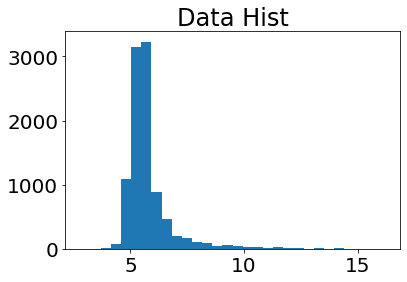

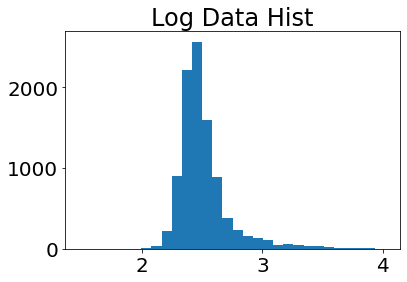


	NUM SAMPLES:9737
	NUM NON-DIA:5964
	NUM PRE: 2591
	NUM DIA: 1182


In [14]:
log_data = fmm.Data_import(data_name, log_base)

<h3>FINITE MIXTURE MODELING

This function call provides the log transformed data to a finite mixture modeling package to model 2 gaussian distributions. It will also provide several graphs to show the fit of the distribution to the data.The first graph is the histogram of the data with the modeled distribtuions on top. The second figure the the cumulative frequency distributions overlayed.

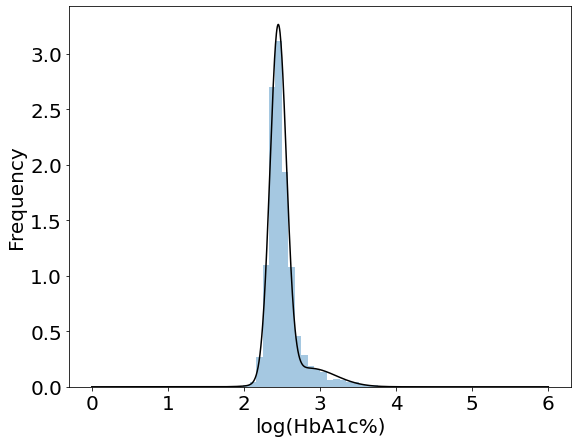

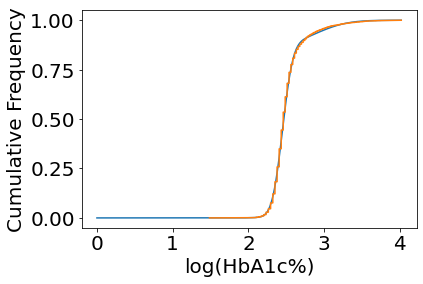


MODEL PARAMS
---------------------------------------------------------------------
Goodness of Fit: 0.4059766014024721 
% OF EACH DISTRIBUTION
%1:  0.8576738273052309
%2: 0.1423261726947503
MEANS OF EACH DISTRIBUTION
MU1: 2.4498434614230526
MU2: 2.8645863585871765
VARIANCE OF EACH DISTRIBUTION
VAR1: 0.011544279752782348
VAR2: 0.11566963173163788


In [15]:
model = fmm.Fmm(log_data)

<h3>Sample Distribution

This function call calls an auxillary function to sample the model produced the the finite mixture model. The fist graph generated shows the histogram of the data sampled from the model. The second graph show the same data set after the log transformation has been removed. Changing the number in the function call will change the number of samples drawn from the distribution.

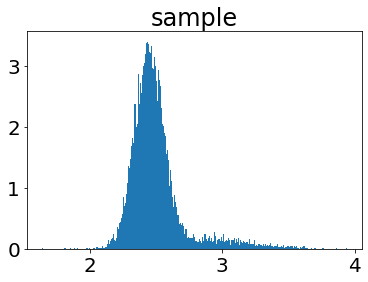

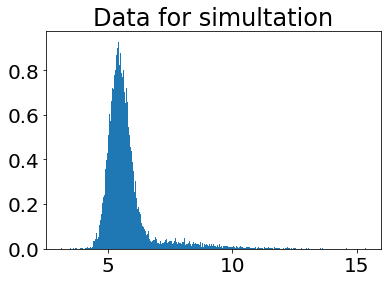

In [16]:
samples = fmm.Sampler(model,10000,log_base)

<h3>Save Data

This function call allows for the sample drawn above to be saved. This can be useful for re-running the simultation with the same population but different error parameters. The sample ill be saved in the SIM_POPULATION folder under the name of the inital data file by defult.

In [16]:
fmm.Write_pop(data_name,samples)

<h3>LOAD DATA FOR SIMULATION

1. The following function call can be used to load a data set from the SIM_POPULATION folder.

In [3]:
data = np.loadtxt(open("SIM_POPULATION/"+data_name,"rb"),delimiter=",")

2. If a new sample population was just made, there is no need to load one from file. This code converts the variable name to run the simulation.

In [25]:
data = samples

<h3> Error Simulation

These are the parameters for the error simulation. The values of bias and cv are in decimal representation of precentages.
The cut off provided in the inital code are reflective of the ADA guide lines. 

**Be advised** that the simulation may run for a long time depending on how large the population is and how fine the step size is. The code uses parellel computing methods to speed up the computation but could be taxing on most computers. It is set up to detect the number of precessors in the computer to scale with your existing computer archetecture. We make no claims as to the robustness of this code with regards to operating system or hardware. *(best to start with small simulations to get a feel for what your computer can handel)*

In [26]:
#SET VALUES HERE
#####################################
#thresholds for diagnosis
cut_offs = [5.7,6.5]

bias_min = -0.2
bias_max = 0.2

cv_min = 0.0
cv_max = 0.2

step_size = 0.001
#####################################

This is the function call for the error simulation. A progress bar will apeare to show how long in estimate it will take to complete and how many more error calculations are left. The results of the simulation are saved once the simulation is complete in the SIMULATION_DATA folder, this is done so if graphing can be done without running the simulation each time. The results are saved with the name of the data set for consitency and a prefix 0 = non-diabetic, 1= pre-diabetic and, 2 = diabetic. 

In [28]:
results = es.Error_simulation(data, cut_offs, bias_min, bias_max, cv_min, cv_max, step_size)
es.Save_simulation(data_name,results,cut_offs)

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [00:03<00:00, 11.50it/s]


<h3>Plot the Simulation Data

Non-Diabetics


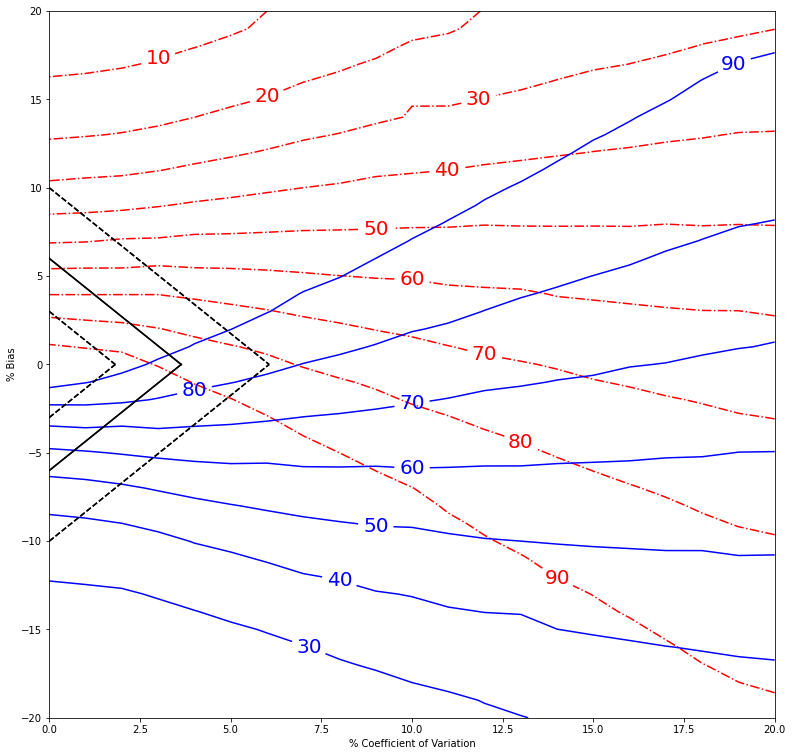

Pre-Diabetics


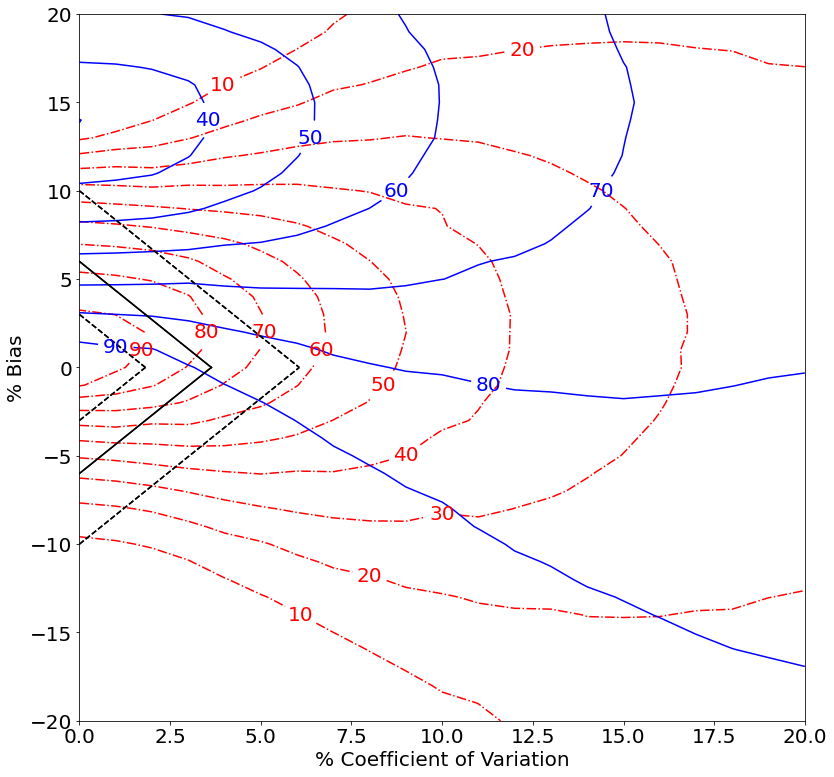

Diabetics


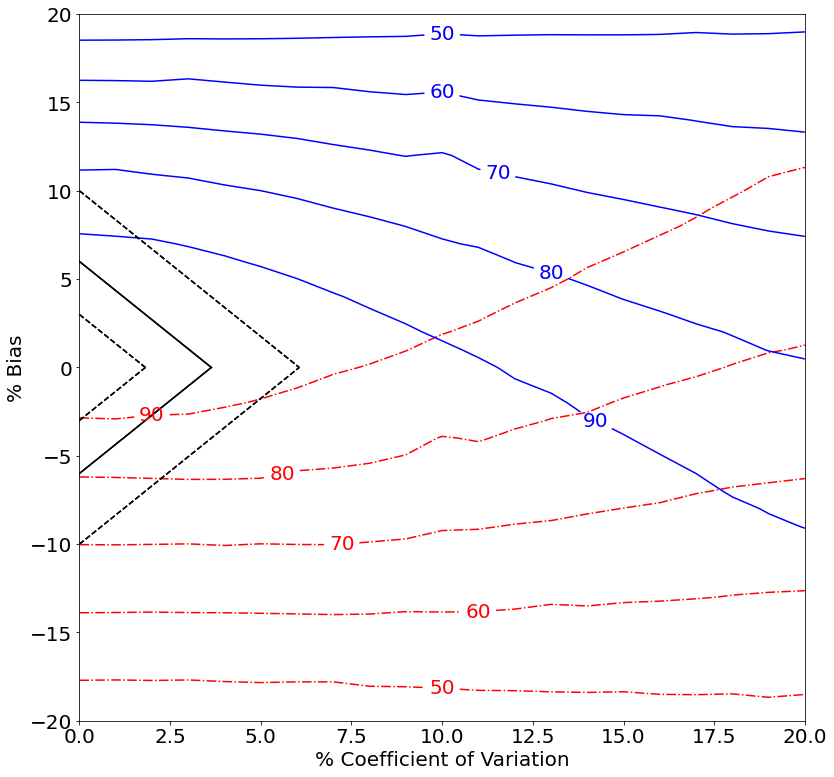

In [3]:
#%matplotlib
print(f'Non-Diabetics')
es.Plotter('0_'+data_name)
print(f'Pre-Diabetics')
es.Plotter('1_'+data_name)
print(f'Diabetics')
es.Plotter('2_'+data_name)